In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

In [42]:
desc_data_path = "../data/raw/Xente_Variable_Definitions.csv"
df_desc = pd.read_csv(desc_data_path)

In [43]:
df_desc.head()

,Column Name,Definition
0,TransactionId,Unique �transaction identifier on platform
1,BatchId,Unique number assigned to a batch of transacti...
2,AccountId,Unique number identifying the customer on plat...
3,SubscriptionId,Unique number identifying the customer subscri...
4,CustomerId,Unique identifier attached to Account


In [44]:
try:
    data_path = "../data/raw/data.csv" 
    df = pd.read_csv(data_path)
    print("✅✅Data loaded successfully.")
    print("The shape of the dataset is:", df.shape)
except FileNotFoundError:
    print("❌❌Data file not found. Please check the file path.")
except pd.errors.EmptyDataError:
    print("❌❌Data file is empty. Please provide a valid data file.")
except pd.errors.ParserError:
    print("❌❌Error parsing data file. Please check the file format.")


✅✅Data loaded successfully.
The shape of the dataset is: (95662, 16)


In [45]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [46]:
df.shape

(95662, 16)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [48]:
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [49]:
print("Loaded data ready for distributions and visualizations.")

Loaded data ready for distributions and visualizations.


### Numerical Columns Distributions and Visualizations

In [50]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
# Keep track of the categorical columns for visualizations
categorical_cols = df.select_dtypes(include=["object", "category"]).columns

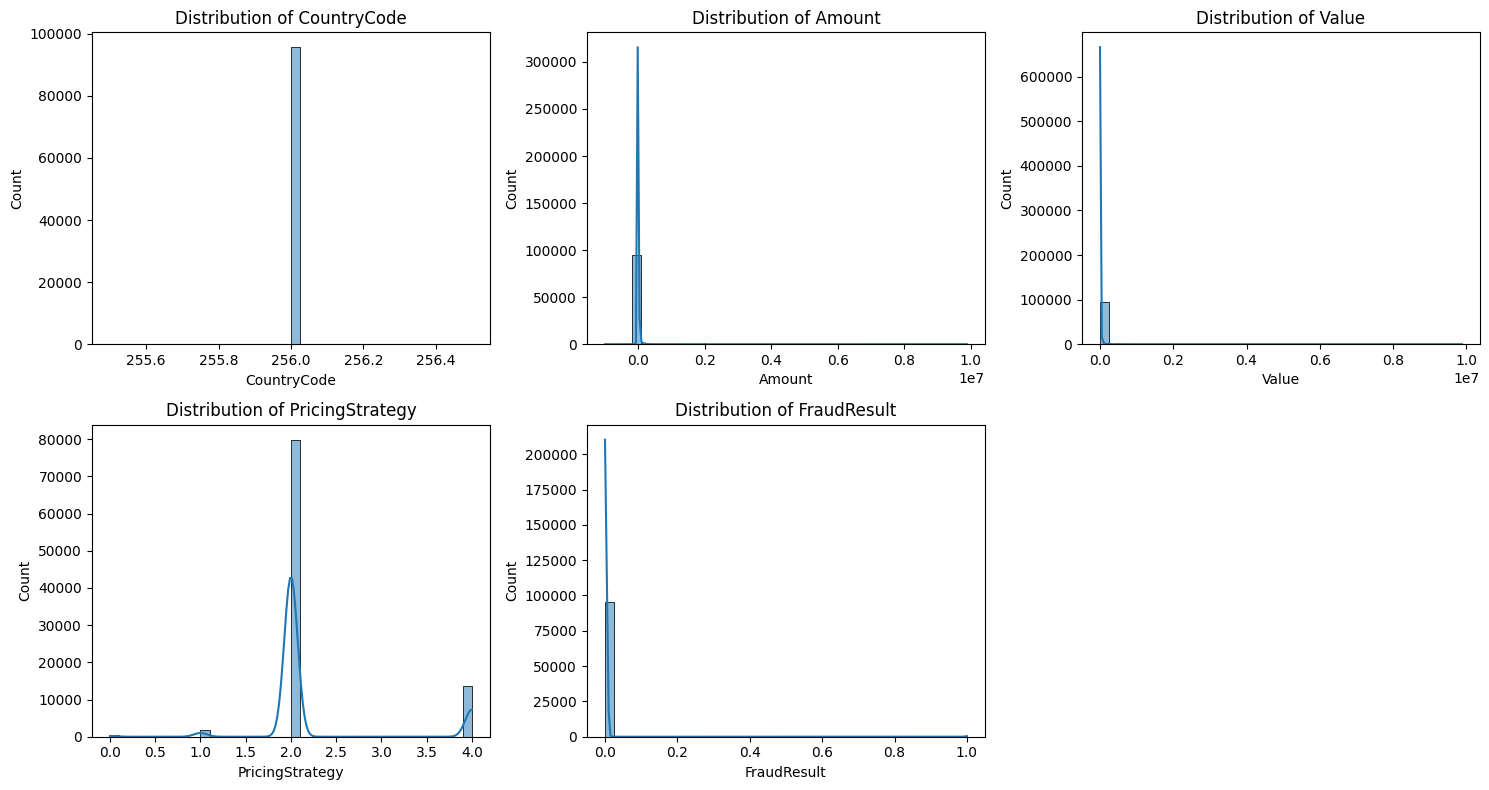

In [51]:
num_cols = len(numeric_cols)  # Should be 5

# Create 2 rows, 3 columns (total 6 slots, we'll use 5)
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()  # Now a 1D list of 6 axes

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=40, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}", fontsize=12)

# Hide the last unused subplot (axes[5])
axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

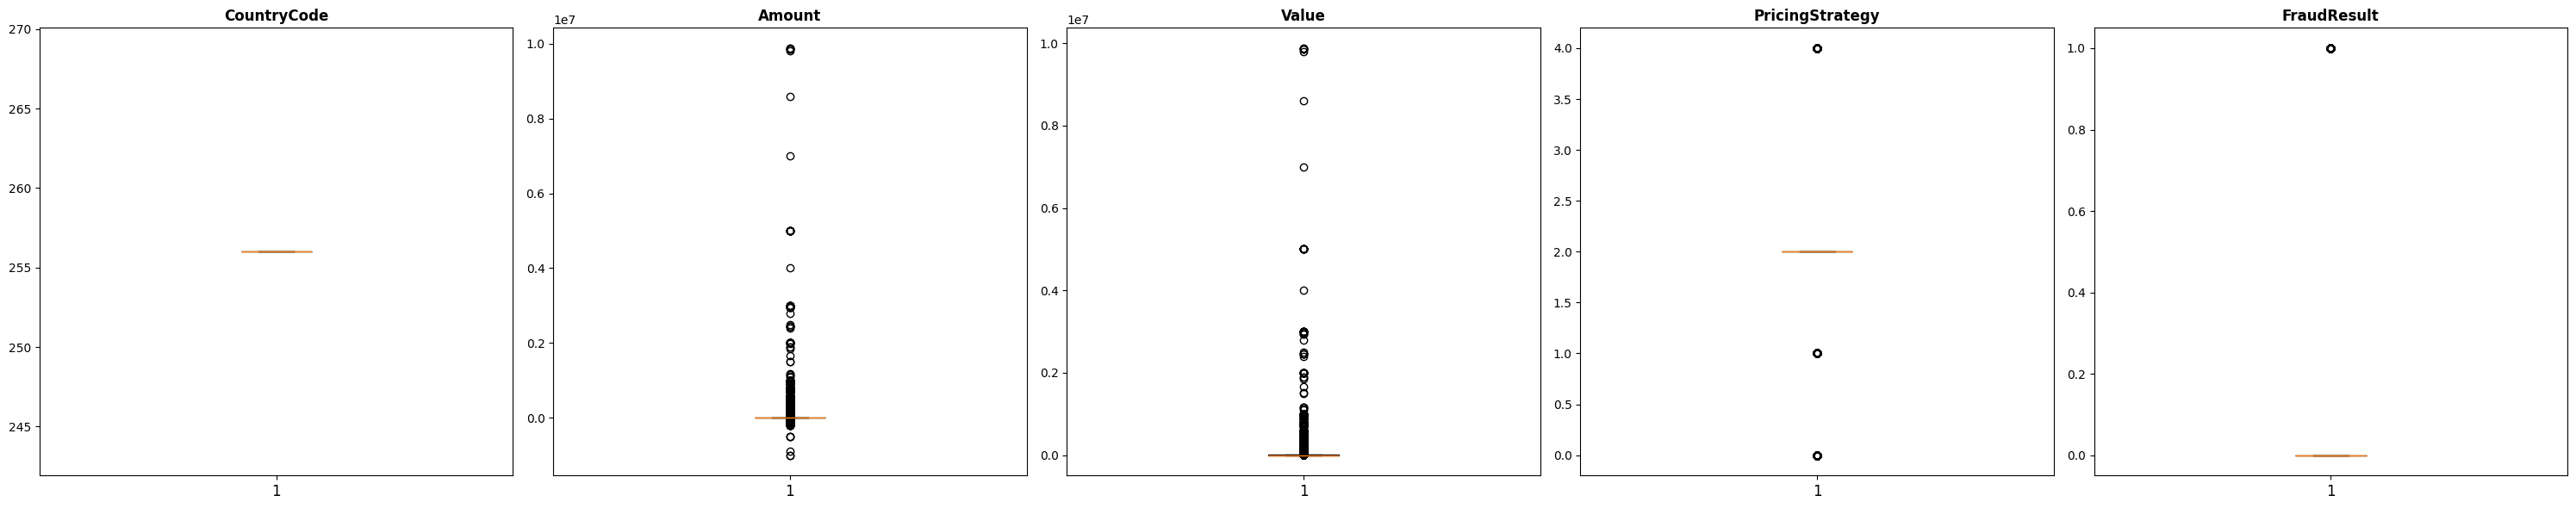

In [52]:
fig, axes = plt.subplots(1, len(numeric_cols), figsize=(6 * len(numeric_cols), 6))
for i, ax in enumerate(axes.flat):
    ax.boxplot(df[numeric_cols[i]].dropna(), vert=True, patch_artist=True)
    ax.set_title(numeric_cols[i], fontsize=12, fontweight='bold')
    ax.tick_params(axis='x', labelsize=12)
plt.tight_layout()


##### ✅Numerical distributions done.

In [53]:
for col in categorical_cols:
    print(f"\n --- Value counts for {col} ---")
    print(df[col].value_counts().head(10))


 --- Value counts for TransactionId ---
TransactionId
TransactionId_76871     1
TransactionId_73770     1
TransactionId_26203     1
TransactionId_380       1
TransactionId_28195     1
TransactionId_23223     1
TransactionId_118063    1
TransactionId_100640    1
TransactionId_51905     1
TransactionId_130161    1
Name: count, dtype: int64

 --- Value counts for BatchId ---
BatchId
BatchId_67019     28
BatchId_51870     16
BatchId_113893    14
BatchId_127204    12
BatchId_116835    10
BatchId_88001      9
BatchId_49408      7
BatchId_110084     7
BatchId_34879      6
BatchId_86880      6
Name: count, dtype: int64

 --- Value counts for AccountId ---
AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
AccountId_318      1070
AccountId_10        965
AccountId_3595      465
AccountId_751       411
AccountId_2648      359
AccountId_2314      356
Name: count, dtype: int64

 --- Value counts for SubscriptionId ---
SubscriptionId
Subscripti

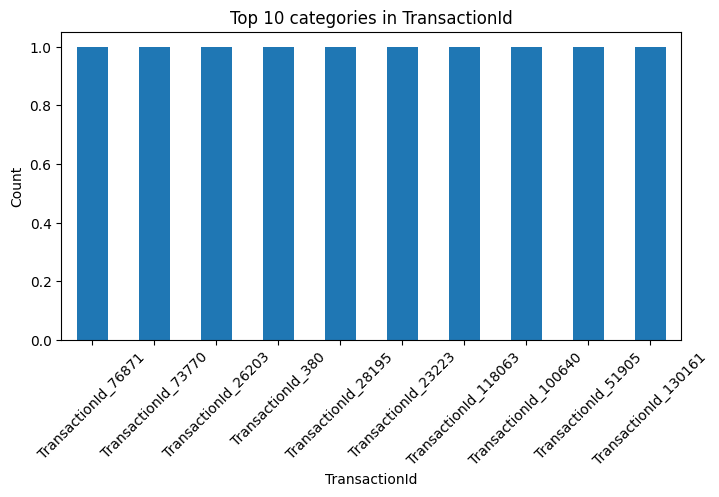

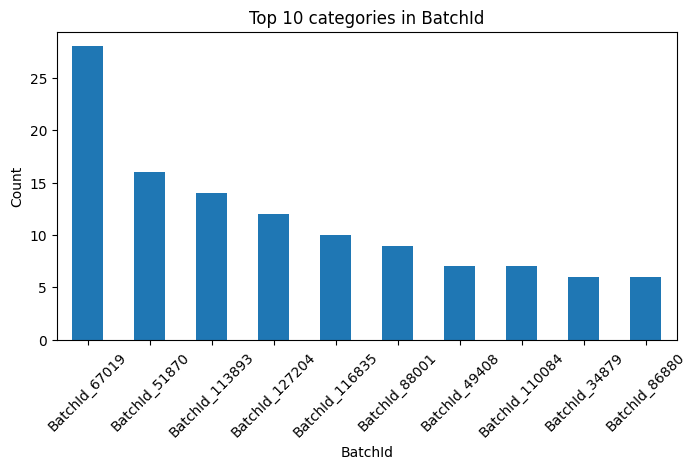

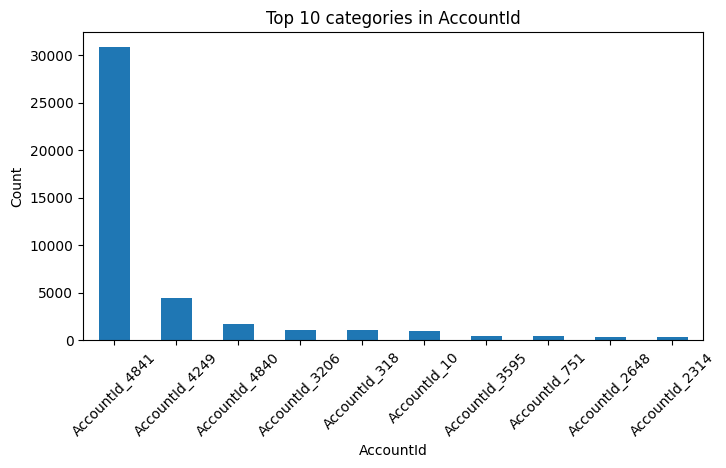

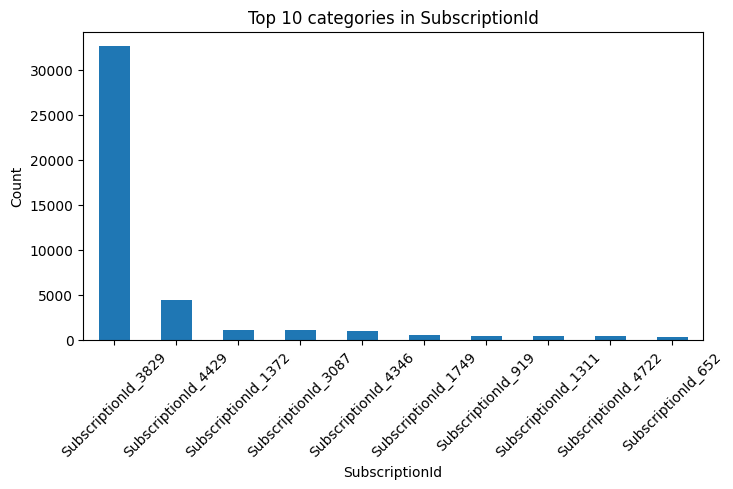

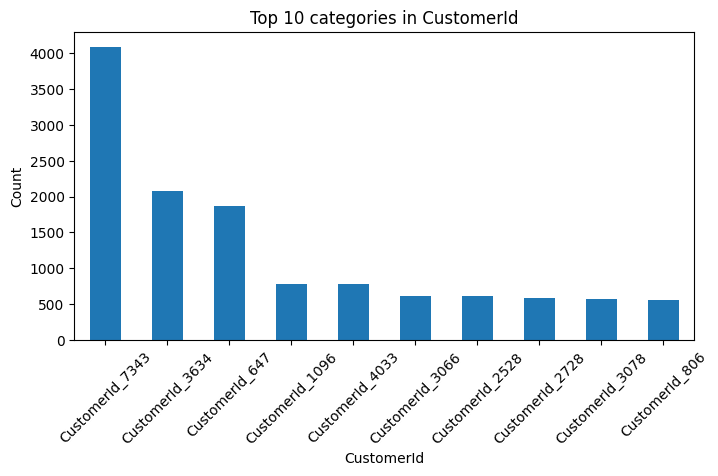

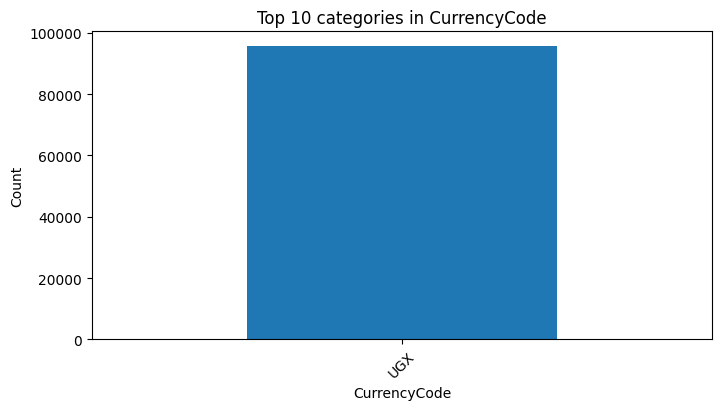

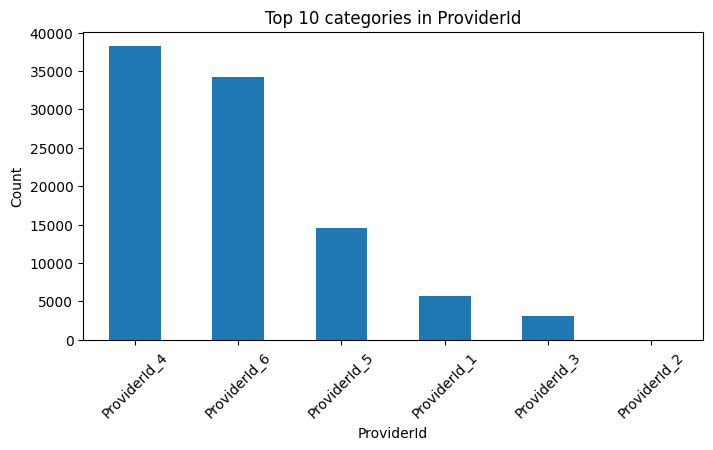

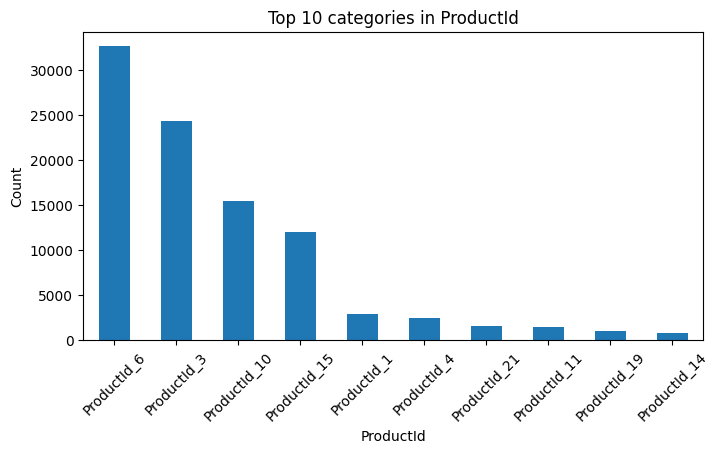

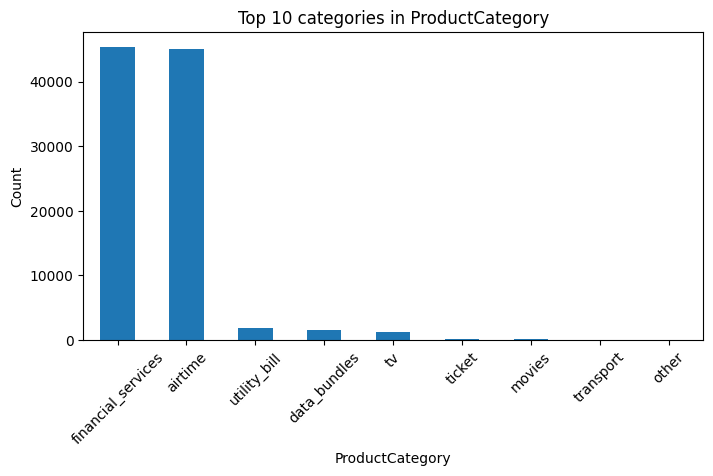

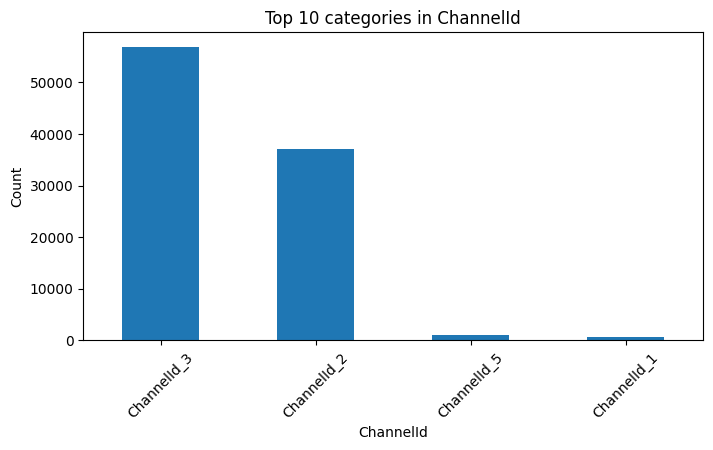

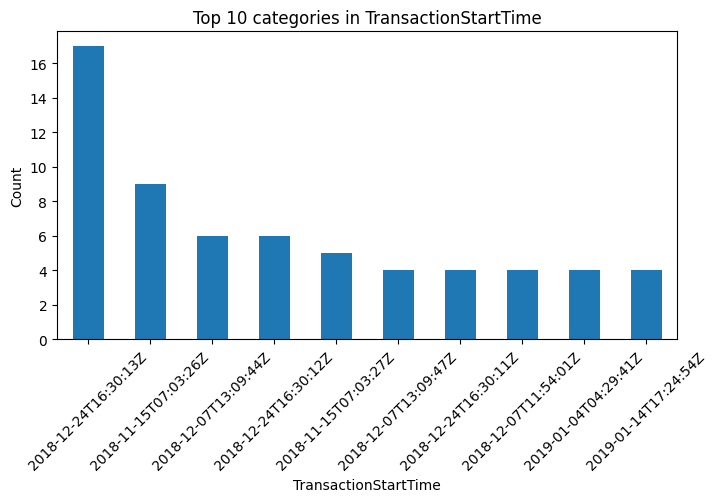

In [59]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f"Top 10 categories in {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

From this we can see that TransactionId is unique for every data and CountryCode and Currency Code are the same for all so we should drop the currency and country code since our machine can't learn anything from it and base our analysis on the relation of other customer behavior expressing features with it

##### Dropping Unnecessary Columns
###### From the graphs, we can see that CurrencyCode and CountryCode are the same throughout our observation
###### Further, TransactionId is unique in every row and SubscriptionId has redundant features with no relevance for the models and prediction so dropping them is needed
###### The other feature is BatchId. It could give us meaning after being engineered and incorporated with accountId but not useful for modeling in its present raw form so we imputed it for the time being.

In [77]:
cols_to_drop = ["CurrencyCode", "CountryCode"]

In [78]:
df_reduced = df.drop(columns=cols_to_drop)

In [79]:
print("Removed 2 unnecessary columns.") 
print(f"Final dataset shape for modeling:", df_reduced.shape)


Removed 2 unnecessary columns.
Final dataset shape for modeling: (95662, 14)


##### Missing Value Handling
###### On our data there are no missing values which gives us an ease from unwanted dropping of rows and reduces the risk of imputation bias.
###### This shows the dataset is complete with high quality and has a positive imapct for financial analysis

In [80]:
missing_count = df_reduced.isnull().sum()
missing_values = missing_count[missing_count > 0]
missing_values

Series([], dtype: int64)

#### RFM Feature Engineering

RFM is an acronym in which 
R - stands for Recency - how recent?
F - for Frequency - how often  and 
M - for the monetary value of each transaction a customer makes - how much?

In such analysis, **high** value shows us that the customer tends to be at **lower risk** to be defaulted because **inactive** or **irregular customers** are most likely to default than the **active** ones.

In [87]:
df_reduced['TransactionTime'] = pd.to_datetime(df_reduced['TransactionStartTime'], format="%Y-%m-%dT%H:%M:%SZ", utc=True)
print("✅ Converted the transaction start time to date time.")

✅ Converted the transaction start time to date time.


#### Dataset Overview After Exploratory Data Analysis 

In [85]:
print("Rows, Columns", df_reduced.shape)

Rows, Columns (95662, 15)


In [86]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   TransactionId         95662 non-null  object             
 1   BatchId               95662 non-null  object             
 2   AccountId             95662 non-null  object             
 3   SubscriptionId        95662 non-null  object             
 4   CustomerId            95662 non-null  object             
 5   ProviderId            95662 non-null  object             
 6   ProductId             95662 non-null  object             
 7   ProductCategory       95662 non-null  object             
 8   ChannelId             95662 non-null  object             
 9   Amount                95662 non-null  float64            
 10  Value                 95662 non-null  int64              
 11  TransactionStartTime  95662 non-null  object             
 12  Pric

In [88]:
df_reduced.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,95662.0,6717.846433,123306.797164,-1000000.0,-50.0,1000.0,2800.0,9880000.0
Value,95662.0,9900.583941,123122.087776,2.0,275.0,1000.0,5000.0,9880000.0
PricingStrategy,95662.0,2.255974,0.732924,0.0,2.0,2.0,2.0,4.0
FraudResult,95662.0,0.002018,0.044872,0.0,0.0,0.0,0.0,1.0


##### Correlation Analysis

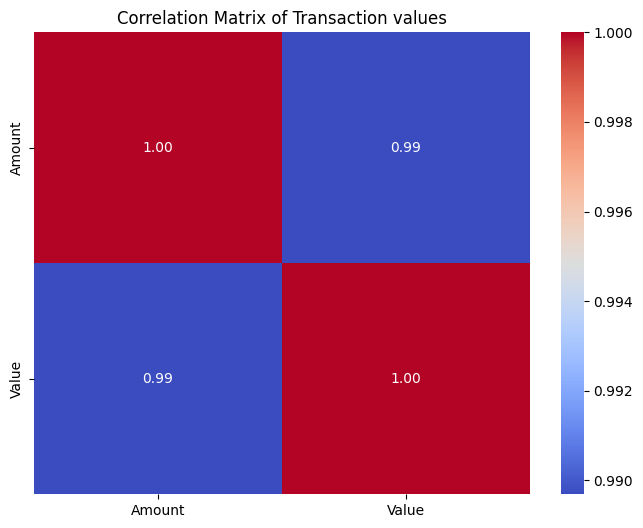

In [89]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_reduced[["Amount", "Value"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Transaction values")
plt.show()

Time Series Analysis of Transaction Patterns

In [90]:
df_reduced["Hour"] = df_reduced["TransactionTime"].dt.hour
df_reduced["Date"] = df_reduced["TransactionTime"].dt.day
df_reduced["Month"] = df_reduced["TransactionTime"].dt.month

Text(0, 0.5, 'Number of Transactions')

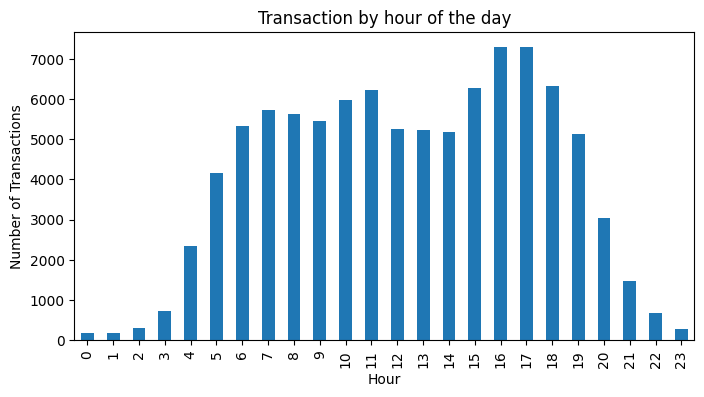

In [91]:
plt.figure(figsize=(8, 4))
df_reduced["Hour"].value_counts().sort_index().plot(kind='bar')
plt.title("Transaction by hour of the day")
plt.xlabel('Hour')
plt.ylabel('Number of Transactions')

Text(0, 0.5, 'Number of Transactions')

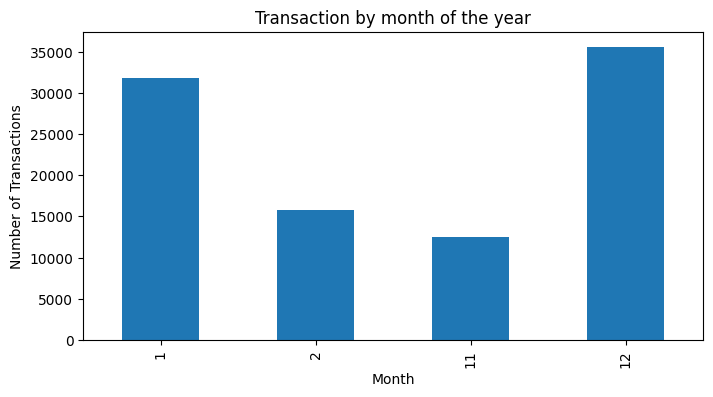

In [93]:
plt.figure(figsize=(8, 4))
df_reduced["Month"].value_counts().sort_index().plot(kind='bar')
plt.title("Transaction by month of the year")
plt.xlabel('Month')
plt.ylabel('Number of Transactions')

## Exploratory Data Analysis Summary

The dataset exhibits high data quality with no missing values across selected features. 
Numerical features such as transaction amount show right-skewed distributions, typical 
of financial transaction data, with the presence of high-value outliers. Categorical 
features reveal strong dominance in specific product categories and transaction channels, 
indicating concentrated customer behavior.

Correlation analysis shows strong association between transaction value and amount, 
suggesting overlapping information. Time-based analysis indicates 
distinct transaction activity patterns during night time and in the last and first months of the year.

### Descriptive Statistics Insights

The numerical features exhibit characteristics typical of financial transaction data. 
Transaction Amount and Value are highly right-skewed, with median values significantly 
lower than the mean, indicating the presence of extreme high-value transactions. 
Negative values are observed, likely representing transaction reversals or refunds, 
and are therefore considered meaningful rather than data errors.

PricingStrategy is a discrete numerical feature with a limited range of values, 
suggesting it should be treated as a categorical variable during modeling. 
FraudResult is highly imbalanced, with the vast majority of transactions labeled 
as non-fraudulent, confirming the realistic nature of the dataset.

Overall, the descriptive statistics indicate high data quality and support the need 
for aggregation-based feature engineering such as RFM to stabilize individual 
transaction-level variability.